In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl 
import plotly.express as py
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
data = pd.read_fwf('test.dat', header=None, names = ["x", "y", "u"], widths=[21,30,35])
data.shape

(5000, 3)

In [5]:
data.head()

,x,y,u
0,5.000000e-07,5.000000e-07,10.414622
1,1.500000e-06,5.000000e-07,9.026352
2,2.500000e-06,5.000000e-07,7.614043
3,3.500000e-06,5.000000e-07,6.187198
4,4.500000e-06,5.000000e-07,5.474294


In [6]:
data.dtypes

x    float64
y    float64
u    float64
dtype: object

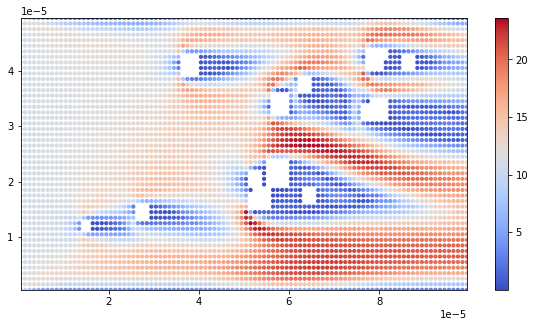

In [7]:
plt.figure(figsize=(10, 5))
cm = mpl.cm.get_cmap('coolwarm')
sc = plt.scatter(data.x, data.y, c=data.u, vmin=min(data.u), vmax=max(data.u), s= 10, cmap=cm) 
plt.colorbar(sc) 
plt.xlim(min(data.x), max(data.x))
plt.ylim(min(data.y), max(data.y))
plt.show() 

In [8]:
sum(data.u.isnull())

165

In [9]:
data['walls'] = data.u
data.walls[~data.walls.isnull()] = 0
data.walls[ data.walls.isnull()] = 1

# velocity is zero inside the walls
data.u[data.u.isnull()] = 0

In [10]:
x = data.x.values.reshape(50,100)
y = data.y.values.reshape(50,100)
u = data.u.values.reshape(50,100)
walls = data.walls.values.reshape(50,100)

In [11]:
x.shape

(50, 100)

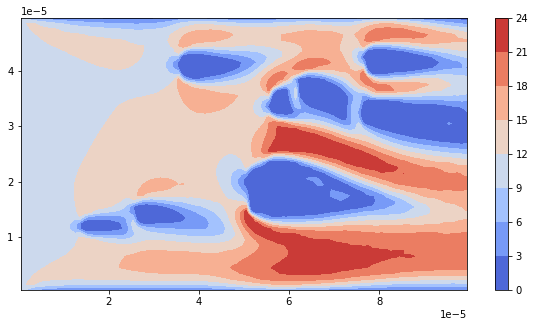

In [12]:
plt.figure(figsize=(10, 5))
cm = mpl.cm.get_cmap('coolwarm')
g = plt.contourf(x, y, u, cmap=cm)
g = plt.colorbar(g)

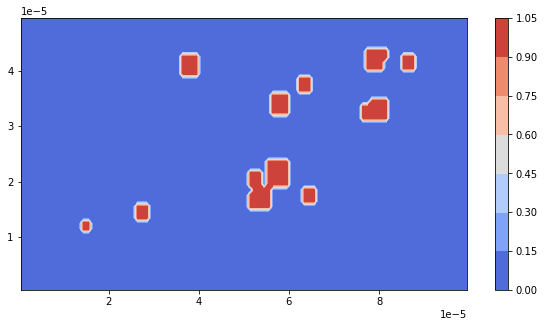

In [13]:
plt.figure(figsize=(10, 5))
cm = mpl.cm.get_cmap('coolwarm')
g = plt.contourf(x, y, walls, cmap=cm)
g = plt.colorbar(g)

In [14]:
# test: converting a pandas data array into tf tensor
u_tf = tf.convert_to_tensor(u)

u_tf.shape, u.shape

(TensorShape([50, 100]), (50, 100))

In [15]:
u_tf[0,0:5], u[0,0:5] # does not return values for tensor

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([10.41462229,  9.02635235,  7.6140426 ,  6.18719831,  5.4742936 ])>,
 array([10.41462229,  9.02635235,  7.6140426 ,  6.18719831,  5.4742936 ]))